In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (176 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_results.csv to final_results.csv


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


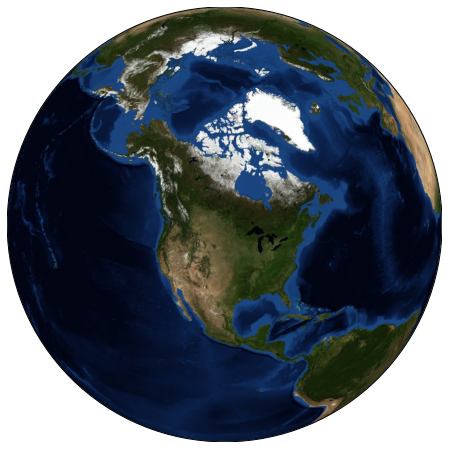

In [ ]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

In [ ]:
from geopy.geocoders import Nominatim

def get_latitude(city):
  geolocator = Nominatim(user_agent='myapplication')
  location = geolocator.geocode(city)
  if location:
    return location.raw.get('lat')
  else:
    return 0

def get_longitude(city):
  geolocator = Nominatim(user_agent='myapplication')
  location = geolocator.geocode(city)
  if location:
    return location.raw.get('lon')
  else:
    return 0

In [ ]:
import csv
import io

# cities = set()
# pm25_CI = []

pm_cities = set()
temp_cities = set()
final_cities = set()

pm25_results = pd.read_csv(io.BytesIO(uploaded["final_1000_pm25_results.csv"]))
temp_results = pd.read_csv(io.BytesIO(uploaded["final_1000_temp_results.csv"]))

for index, row in pm25_results.iterrows():
  pm_cities.add(row['city'])

for index, row in temp_results.iterrows():
  temp_cities.add(row['city'])

final_cities = pm_cities.intersection(temp_cities)

In [ ]:
print(len(final_cities))

547


In [ ]:
temp_CI = {}
for index, row in temp_results.iterrows():
  city = row['city']
  if city in final_cities:
    temp_CI[city] = row['CI']

pm_CI = {}
for index, row in pm25_results.iterrows():
  city = row['city']
  if city in final_cities:
    pm_CI[city] = row['CI']

In [ ]:
print(final_cities)

{'Adana', 'Tallahassee', 'Columbus', 'Lampang', 'Salamanca', 'Tours', 'Kitchener', 'Miyazaki', 'Little Rock', 'Preston', 'Ḩawallī', 'Ghāziābād', 'Delhi', 'Ulsan', 'Daegu', 'Dnipro', 'Glasgow', 'Turin', 'Antwerpen', 'Vientiane', 'Las Vegas', 'Wrocław', 'Tianjin', 'Denver', 'Olomouc', 'Rotterdam', 'Ottawa', 'Worcester', 'Gifu-shi', 'San Salvador', 'Yinchuan', 'Quilpué', 'Memphis', 'Abidjan', 'Matsuyama', 'Shijiazhuang', 'Dublin', 'Trieste', 'Grenoble', 'Edinburgh', 'Kayseri', 'Manila', 'Pokhara', 'Bydgoszcz', 'Uppsala', 'Changsha', 'Pécs', 'Sydney', 'Karachi', 'Bogotá', 'Rijeka', 'Strasbourg', 'Yangon', 'Guiyang', 'Sejong', 'Xi’an', 'Tucson', 'Detroit', 'Livorno', 'Macau', 'San Jose', 'Nashville', 'Novosibirsk', 'Breda', 'Nijmegen', 'Winnipeg', 'Sendai', 'İzmir', 'Caen', 'Kryvyi Rih', 'Adelaide', 'Bologna', 'Ashkelon', 'San Francisco', 'Perpignan', 'Madison', 'Katowice', 'Isfahan', 'Kielce', 'Busan', 'Toluca', 'Funchal', 'Amiens', 'San Antonio', 'Bratislava', 'Klerksdorp', 'Vancouver', '

In [ ]:
lat = {}
for key in final_cities:
  lat[key] = get_latitude(key)

lon = {}
for key in final_cities:
  lon[key] = get_longitude(key)

#City, Lat, Long, PM25_CI, Temp_CI

KeyboardInterrupt: ignored

In [ ]:
print(lat)
print(lon)

In [ ]:
# get colour variable from CI
def get_colour(CI):
  # colour = None # 0 if no data for city
  if (CI >= 95):
    colour = 'orange'
  elif (CI >= 90):
    colour = 'gold'
  elif (CI >= 85):
    colour = 'midnightblue'
  elif (CI >= 80):
    colour = 'deepskyblue'
  elif (CI >= 50):
    colour = 'lightskyblue'
  else:
    colour = 'azure'
  return colour

In [ ]:
results = pd.DataFrame(columns = ['City', 
                        'Latitude',
                        'Longitude', 
                        'PM25_CI', 
                        'PM25_colour', 
                        'Temp_CI', 
                        'Temp_colour'])

In [ ]:
print(results)

                         City            Latitude  ... Temp_CI  Temp_colour
0                       Adana          36.9936175  ...    73.9            5
1                 Tallahassee          30.4380832  ...    86.2            3
2                    Columbus          39.9622601  ...    86.5            3
3                     Lampang          18.6799728  ...    99.9            1
4                   Salamanca          40.9651572  ...    75.4            5
..                        ...                 ...  ...     ...          ...
542  Donostia / San Sebastián          43.3224219  ...    85.7            3
543                Kermanshah          34.3789744  ...    71.9            5
544                Chiang Mai           18.790876  ...    99.9            1
545                   Kolkata         22.54541245  ...    50.0            5
546                     Hāpur  28.740612499999997  ...    99.5            1

[547 rows x 7 columns]


In [ ]:
for city in final_cities:
  results = results.append({'City': city, 
                          'Latitude': lat[city], 
                          'Longitude': lon[city], 
                          'PM25_CI': pm_CI[city], 
                          'PM25_colour': get_colour(pm_CI[city]), 
                          'Temp_CI': temp_CI[city], 
                          'Temp_colour': get_colour(temp_CI[city])},
                          ignore_index=True)

TypeError: ignored

In [ ]:
# export data
results.to_csv("results.csv", index=False, encoding='utf-8-sig')

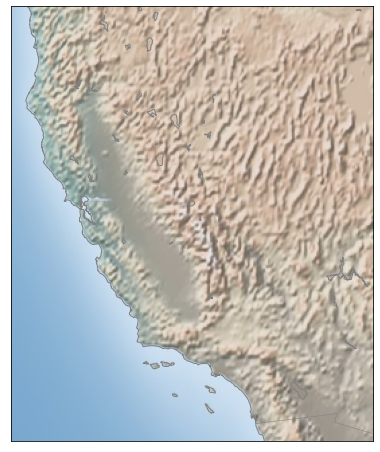

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

In [ ]:
latitudes = list(lat.values())
longitudes = list(lon.values())
pm25_colours = results['PM25_colour'].values
temp_colours = results['Temp_colour'].values

In [ ]:
print(latitudes)

['36.9936175', '30.4380832', '39.9622601', '18.6799728', '40.9651572', '47.3900474', '43.453168', '31.9076334', '34.7464809', '53.7593363', 0, '28.711241', '28.6273928', '35.5391697', '35.8713', '51.9191343', '55.8609825', '45.0677551', '51.2211097', '17.9640988', '36.1672559', '51.1089776', '39.3032619', '39.7392364', '49.5940567', '51.9228958', '45.421106', '42.2625932', '35.4230949', '13.6989939', '38.4852037', '-33.0498135', '35.1490215', '5.4091179', '33.8395188', '38.0429742', '53.3497645', '45.6500335', '45.1875602', '55.9533456', '38.6582232', '14.5907332', '28.209538', '53.1219648', '59.8586126', '28.2302056', '46.0763222', '-33.8548157', '24.8667795', '4.59808', '45.3271752', '48.584614', '16.7967129', '26.6499922', '36.4799999', '34.3468421', '32.2228765', '42.3315509', '42.79021905', '22.1757605', '37.3361905', '36.1622296', '55.0282171', '51.5887845', '51.842574850000005', '49.8955367', '38.2677554', '38.4147331', '49.1810037', '47.9102734', '-34.9281805', '44.4936714', '3

In [ ]:
# import final_results
final_results = pd.read_csv(io.BytesIO(uploaded["final_results.csv"]))

In [ ]:
print(final_results)

                         City   Latitude  ...   Temp_Str_Col   PM25_Str_Col
0                       Adana  36.993617  ...  paleturquoise          azure
1                 Tallahassee  30.438083  ...    deepskyblue          azure
2                    Columbus  39.962260  ...    deepskyblue       darkblue
3                     Lampang  18.679973  ...       darkblue  paleturquoise
4                   Salamanca  40.965157  ...  paleturquoise     dodgerblue
..                        ...        ...  ...            ...            ...
542  Donostia / San Sebastián  43.322422  ...    deepskyblue    deepskyblue
543                Kermanshah  34.378974  ...  paleturquoise          azure
544                Chiang Mai  18.790876  ...       darkblue  paleturquoise
545                   Kolkata  22.545412  ...  paleturquoise     dodgerblue
546                     Hāpur  28.740613  ...       darkblue     dodgerblue

[547 rows x 9 columns]


In [ ]:
temp_colours = final_results['Temp_CI'].map(lambda x: get_colour(x))
pm25_colours = final_results['PM25_CI'].map(lambda x: get_colour(x))

In [ ]:
print(temp_colours)
print(pm25_colours)
final_results['Temp_Str_Col'] = temp_colours
final_results['PM25_Str_Col'] = pm25_colours

0      lightskyblue
1      midnightblue
2      midnightblue
3            orange
4      lightskyblue
           ...     
542    midnightblue
543    lightskyblue
544          orange
545    lightskyblue
546          orange
Name: Temp_CI, Length: 547, dtype: object
0             azure
1             azure
2            orange
3      lightskyblue
4              gold
           ...     
542    midnightblue
543           azure
544    lightskyblue
545            gold
546            gold
Name: PM25_CI, Length: 547, dtype: object


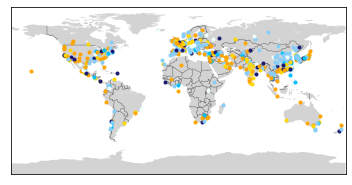

In [ ]:
# plot pm25_colours
fig = plt.figure()
m = Basemap()
m.drawcountries(color='dimgrey')
m.fillcontinents(color='lightgrey')
for index, row in final_results.iterrows():
  city = row['City']
  latitude = row['Latitude']
  longitude = row['Longitude']
  pm25_colour = row['PM25_Str_Col']
  m.plot(longitude, latitude, marker='.', color=pm25_colour)
plt.show()
fig.savefig("pm25_colours.png", dpi=600)

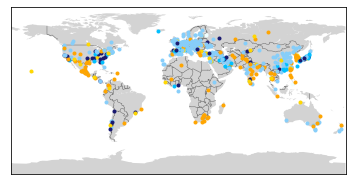

In [ ]:
# plot temp_colours
fig2 = plt.figure()
m = Basemap()
m.drawcountries(color='dimgrey')
m.fillcontinents(color='lightgrey')
for index, row in final_results.iterrows():
  city = row['City']
  latitude = row['Latitude']
  longitude = row['Longitude']
  temp_colour = row['Temp_Str_Col']
  m.plot(longitude, latitude, marker='.', color=temp_colour)
plt.show()
fig2.savefig("temp_colours.png", dpi=600)

In [ ]:
print(xpt)

<built-in method values of dict object at 0x7fef9c443e10>
